In [6]:
import librosa
# import librosa.display
import IPython.display as ipd
import numpy as np
import os
from matplotlib import pyplot as plt

import sounddevice as sd
from IPython.core.display import display as core_display
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [35]:
class Guitar:
    def __init__(self, guitar_path_):
        "Change retreiving string number"
        self.guitar_path = guitar_path_
        self.strings = dict()
        
        print("Loading of guitar has begun")
        for string_path in os.listdir(self.guitar_path):
            string = int(string_path[:string_path.find(" ")])
            self.strings[string] = String(self.guitar_path, string)
            
        print("Loading of guitar was successfully finished")
        
    def get_string(self, string):
        return self.strings[string]
    
class String:
    def __init__(self, guitar_path, string_):
        
        "Change retreiving fret number"
        self.string = string_
        self.frets = dict()
        
        string_path_ = os.path.join(guitar_path, f"{string_} string/")
        self.string_path = string_path_
        
        print(f"Loading of {self.string} string has begun")
        for fret_path in os.listdir(self.string_path):
            fret = int(fret_path[:fret_path.find(" ")])
            self.frets[fret] = Fret(self.string_path, fret)
    
    def get_fret(self, fret):
        return self.frets[fret]
    
    def show_waveforms(self, frets, filtered=True):
        # visualise the waveforms for few or one frets
        
        num_frets = len(frets)
        plt.figure(figsize=(15, num_frets*3))

        for i, fret in enumerate(frets):
            plt.subplot(num_frets, 1, i + 1)
            if filtered:
                librosa.display.waveshow(self.frets[fret].signal_filtered, alpha=0.5)
            else:
                librosa.display.waveshow(self.frets[fret].signal, alpha=0.5)
            plt.title(f"{self.string} string, {fret} fret")
            plt.ylim((-1, 1))

        plt.show()
    
    def show_envelopes(self, frets, frame_size=1024, hop_length=512):
        # visualise the waveforms for few or one frets
        
        plt.figure(figsize=(15, 3))

        for fret in frets:
            if not hasattr(self.frets[fret], "envelope"):
                self.frets[fret].amplitude_envelope(frame_size=1024, hop_length=512)
            
            frames = range(0, self.frets[fret].envelope.size)
            time = librosa.frames_to_time(frames, hop_length=self.frets[fret].hop_length)
            
            plt.plot(time, self.frets[fret].envelope, label=f"{self.string} string, {fret} fret")
        
        plt.legend()
        plt.show()
    
    def show_envelopes_filtered(self, frets, frame_size=1024, hop_length=512):
        # visualise the waveforms for few or one frets
        
        plt.figure(figsize=(15, 3))

        for fret in frets:
            if not hasattr(self.frets[fret], "envelope"):
                self.frets[fret].amplitude_envelope_filtered(frame_size=1024, hop_length=512)
            
            frames = range(0, self.frets[fret].envelope_filtered.size)
            time = librosa.frames_to_time(frames, hop_length=self.frets[fret].hop_length_filtered)
            
            plt.plot(time, self.frets[fret].envelope_filtered, label=f"{self.string} string, {fret} fret")
        
        plt.legend()
        plt.show()
        
        
    
class Fret:
    def __init__(self, string_path, fret):
        self.fret = fret
        
        fret_path = os.path.join(string_path, f"{fret} fret.mp3")
        self.fret_path = fret_path
        
        fret_signal, sr = librosa.load(self.fret_path)
        self.signal = fret_signal
        self.sr = sr
        
        low_bound = max(0, np.argmax(self.signal) - 4000)
        high_bound = min(len(self.signal), np.argmax(self.signal) + 30000)
        self.signal_filtered = self.signal[low_bound: high_bound]
        
    def play_sound(self):
        sd.play(self.signal)
        
    def display(self):
        "Change to display not by using path, but by using signal"
        core_display(ipd.Audio(self.fret_path))
    
    def show_waveform(self):
        # visualise the waveforms for few or one frets
    
        librosa.display.waveshow(self.signal, alpha=0.5)
        plt.show()
        
    def amplitude_envelope(self, frame_size, hop_length):
        amplitude_envelope = list()

        for i in range(0, len(self.signal), hop_length):
            current_frame_amplitude_envelope = max(self.signal[i:i+frame_size])
            amplitude_envelope.append(current_frame_amplitude_envelope)

        self.envelope = np.array(amplitude_envelope)
        self.hop_length = hop_length
        
    def amplitude_envelope_filtered(self, frame_size, hop_length):
        amplitude_envelope = list()

        for i in range(0, len(self.signal_filtered), hop_length):
            current_frame_amplitude_envelope = max(self.signal_filtered[i:i+frame_size])
            amplitude_envelope.append(current_frame_amplitude_envelope)

        self.envelope_filtered = np.array(amplitude_envelope)
        self.hop_length_filtered = hop_length
    
    def calculate_magnitude_spectrum(self):
        ft = np.fft.fft(self.signal_filtered)
        self.magnitude_spectrum = np.abs(ft)
        
    def show_magnitude_spectrum(self, f_ratio=1):
        if not hasattr(self, "magnitude_spectrum"):
            self.calculate_magnitude_spectrum()
        
        # plotting
        plt.figure(figsize=(18, 3))

        frequency = np.linspace(0, self.sr, len(self.magnitude_spectrum))
        num_frequency_bins = int(len(frequency) * f_ratio)

        plt.plot(frequency[:num_frequency_bins], self.magnitude_spectrum[:num_frequency_bins])
        plt.xlabel("frequency")
        plt.title(f"{self.fret} fret")

        plt.show()

In [49]:
# guitar = Guitar(guitar_path)
guitar = Guitar(guitar_path_="Guitar/")

Loading of guitar has begun
Loading of 5 string has begun
Loading of 6 string has begun
Loading of 1 string has begun
Loading of 3 string has begun
Loading of 2 string has begun
Loading of 4 string has begun
Loading of guitar was successfully finished


In [50]:
guitar.get_string(1).get_fret(0).play_sound()

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


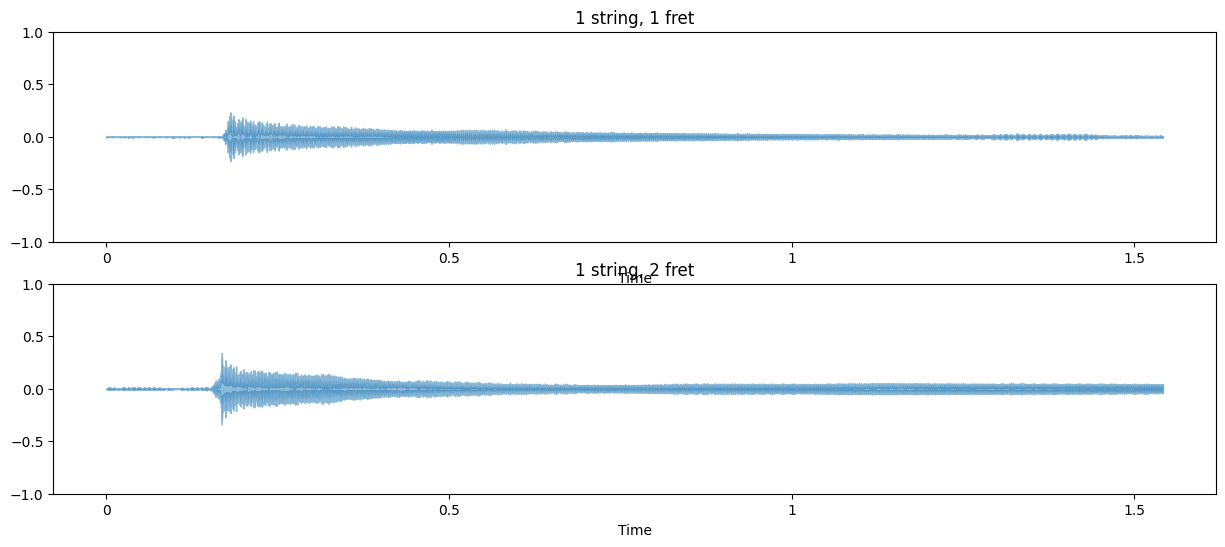

In [51]:
guitar.get_string(1).show_waveforms([1, 2])

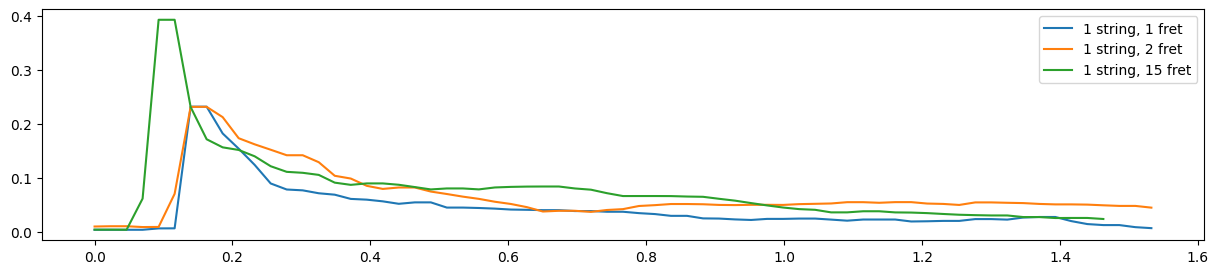

In [52]:
guitar.get_string(1).show_envelopes_filtered([1, 2, 15], frame_size=1024, hop_length=512)

In [53]:
guitar.get_string(1).get_fret(1).calculate_magnitude_spectrum()
guitar.get_string(1).get_fret(1).magnitude_spectrum.max()

268.89116596156447

In [54]:
for fret in range(21):
    guitar.get_string(1).get_fret(fret).calculate_magnitude_spectrum()
    print(guitar.get_string(1).get_fret(fret).magnitude_spectrum.max())

1248.9348042862887
268.89116596156447
434.591943361623
659.7706103080969
459.9385504207182
418.6148445966058
616.0559172426248
354.6338325071765
326.5731162580472
508.0264748286653
535.6218937578257
455.268842329523
362.277537618744
285.0667036483473
546.6318726672863
751.5720743410398
771.5645085739883
1385.8374536603287
485.2244735021701
1351.520041711173
1294.5157837917964


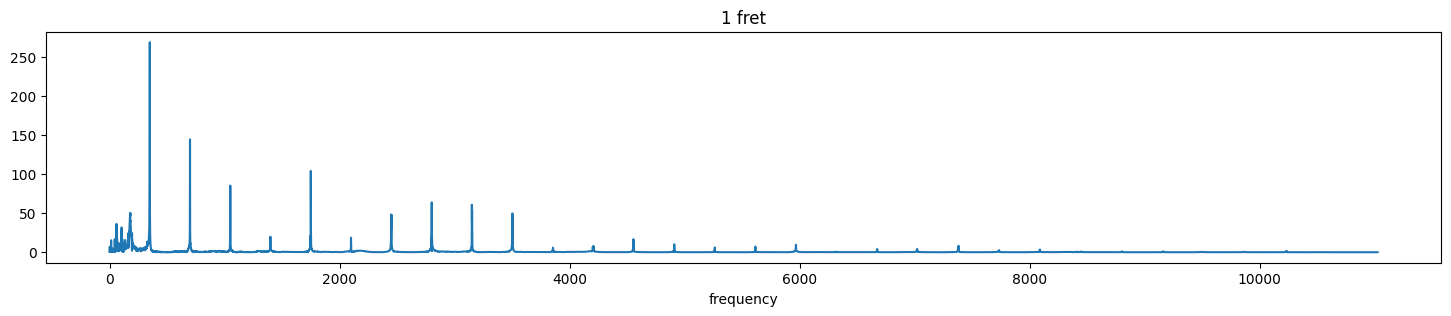

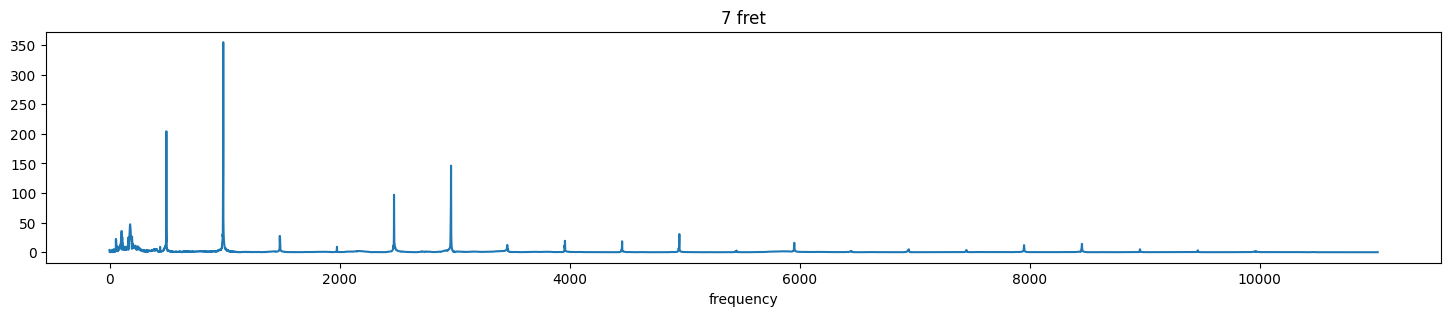

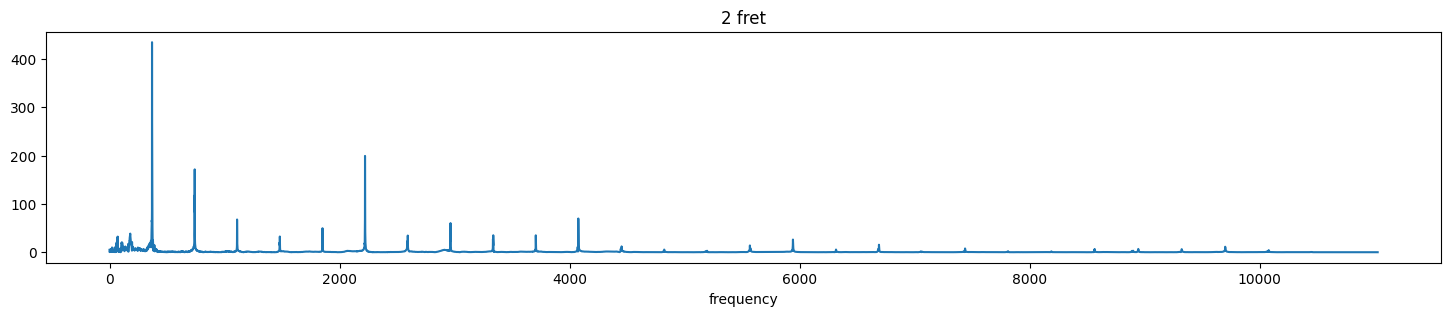

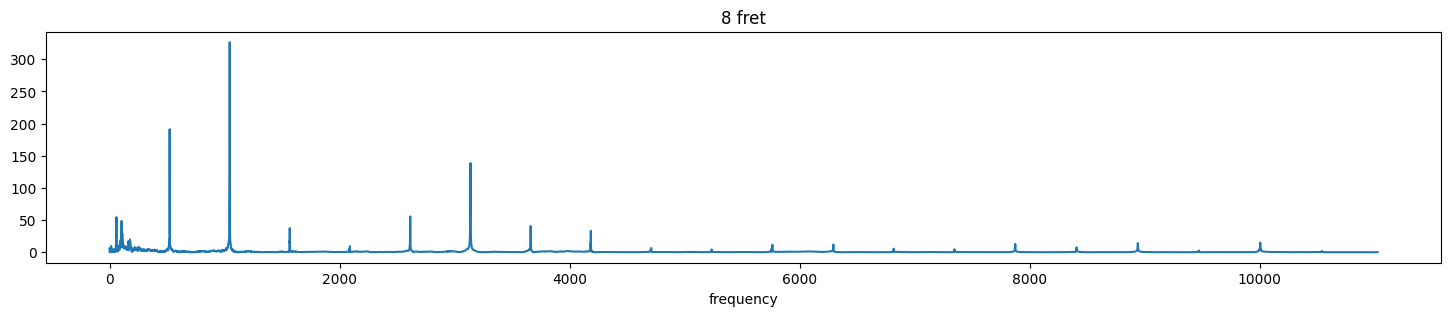

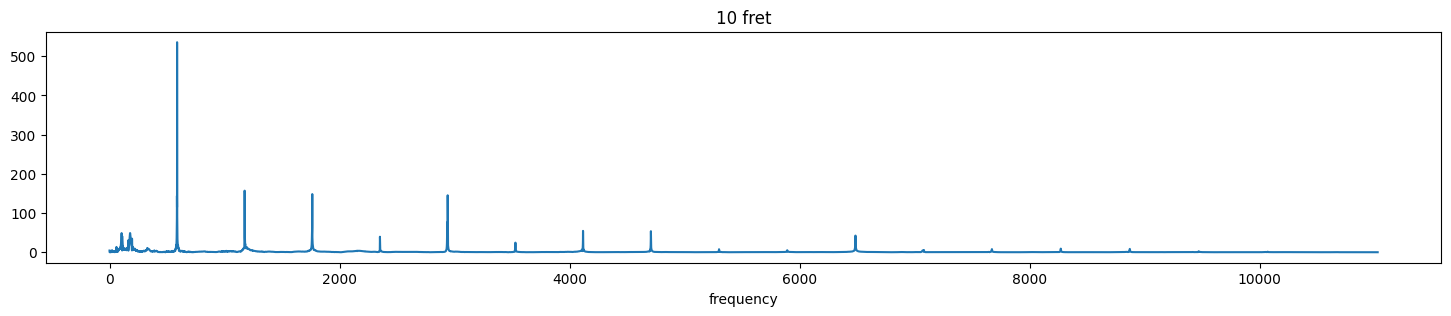

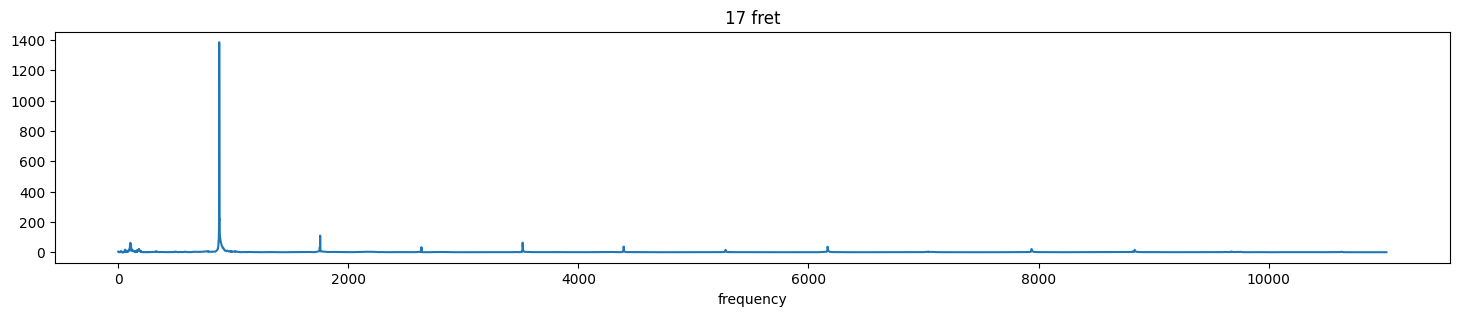

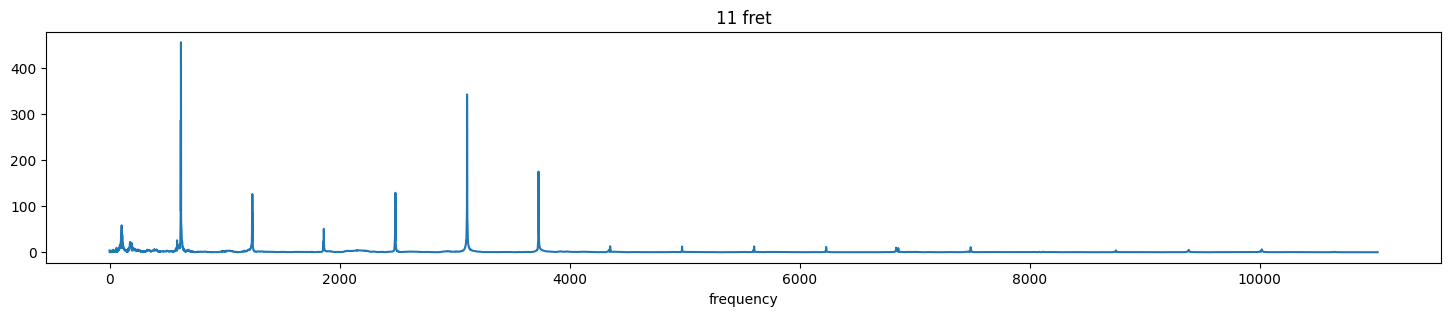

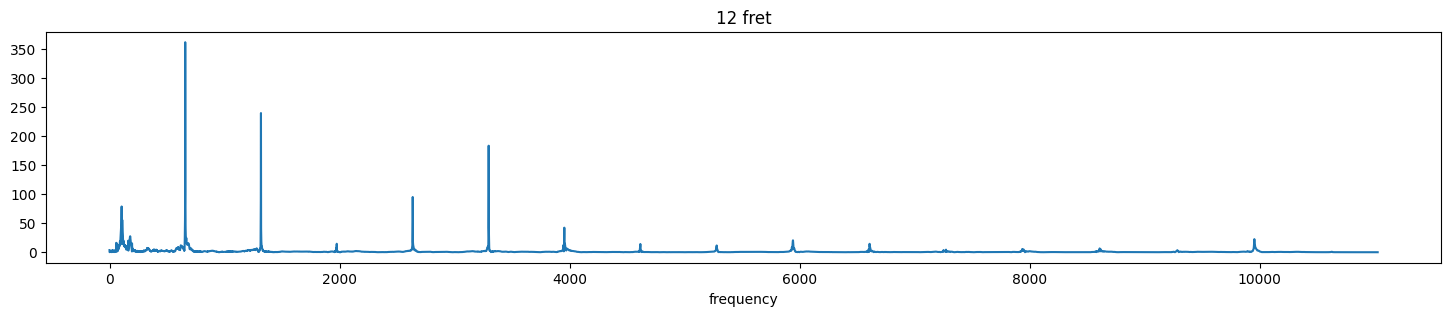

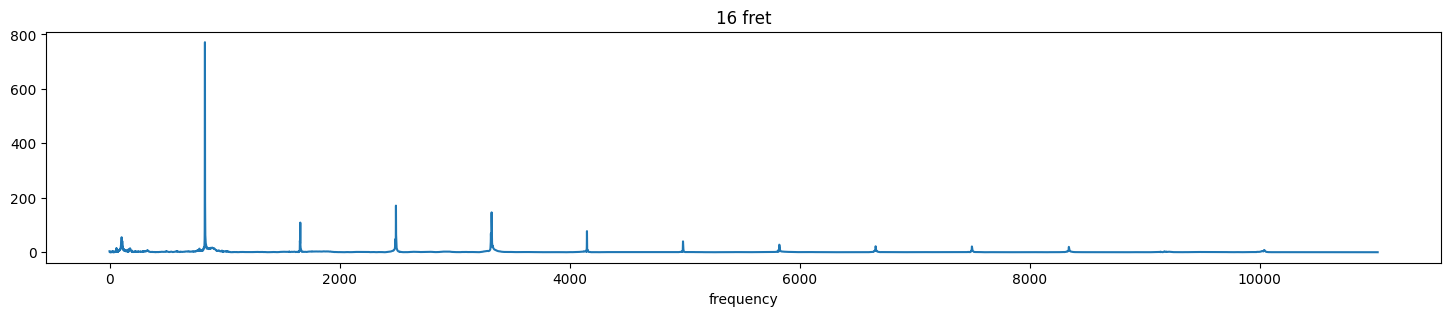

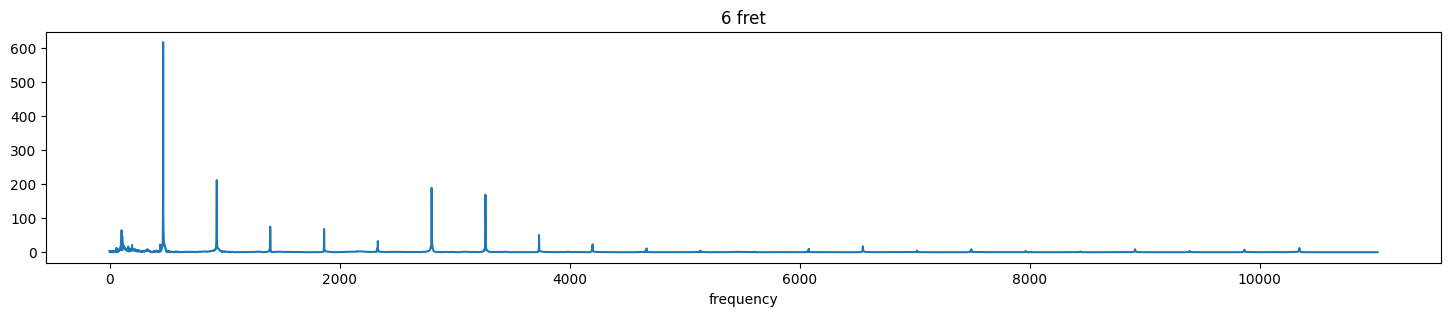

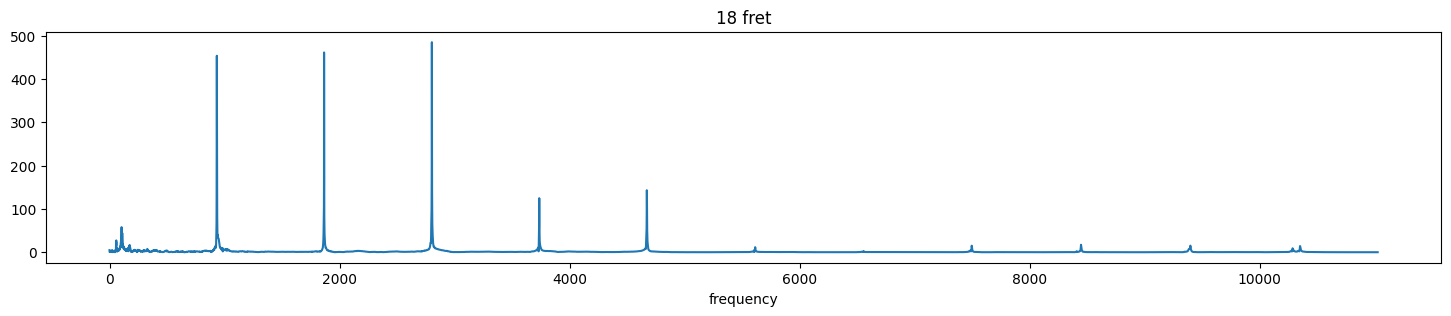

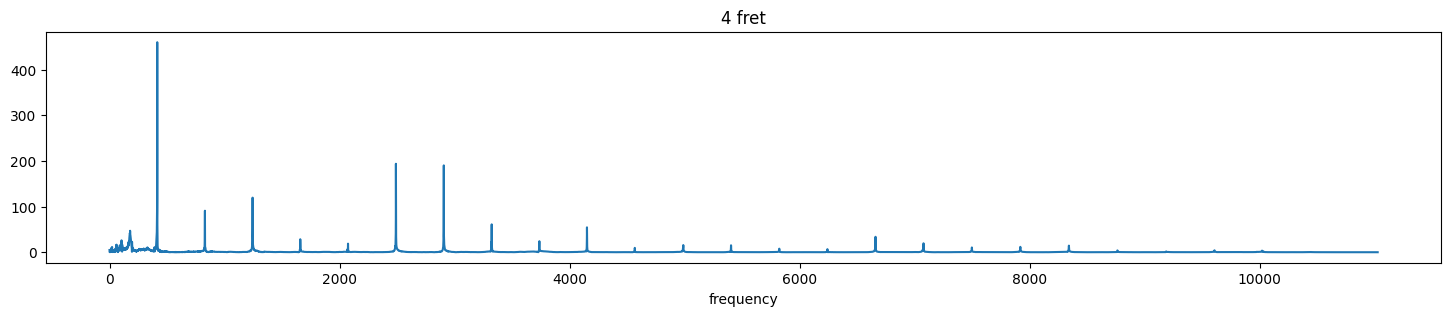

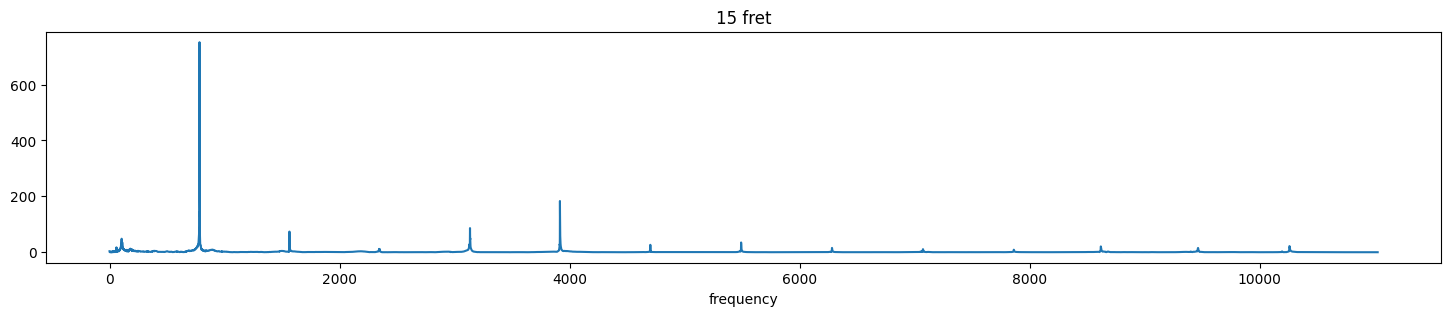

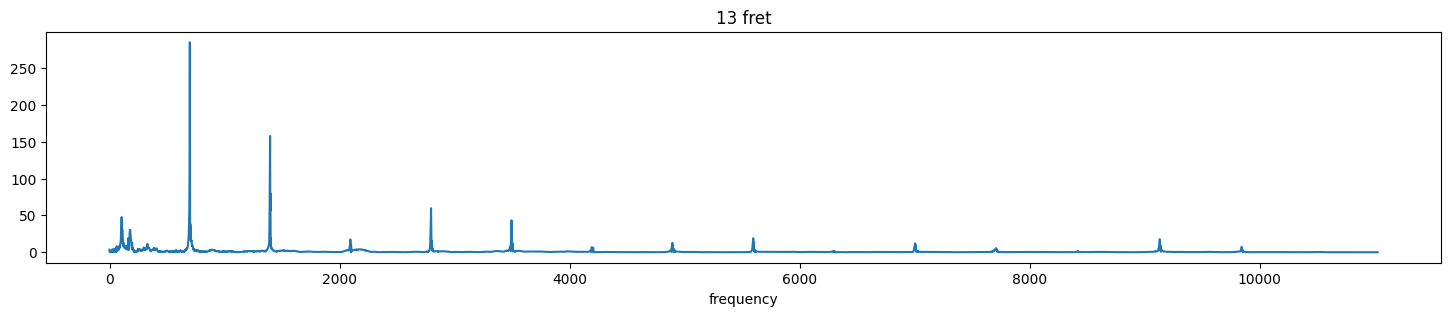

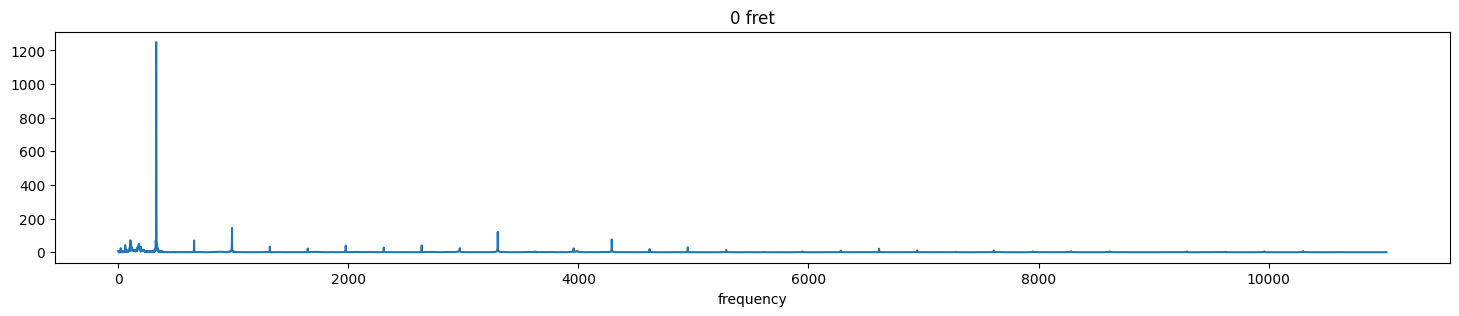

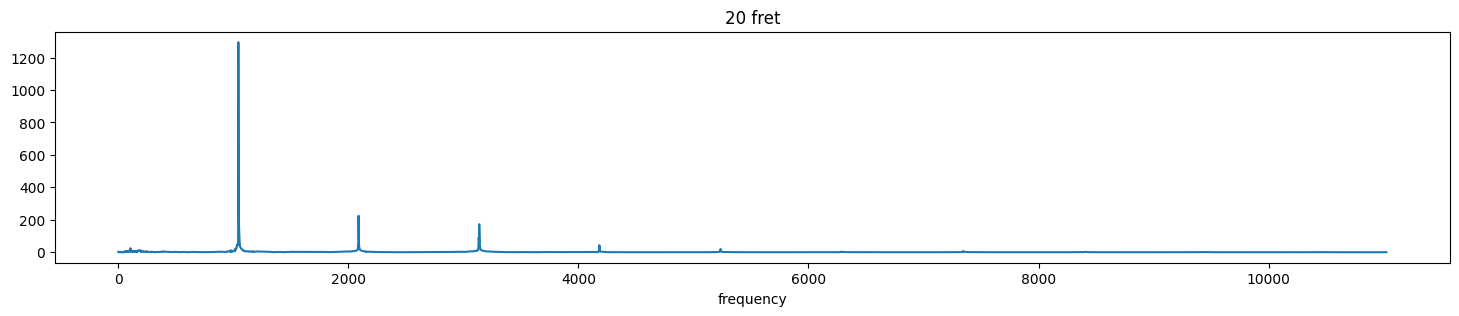

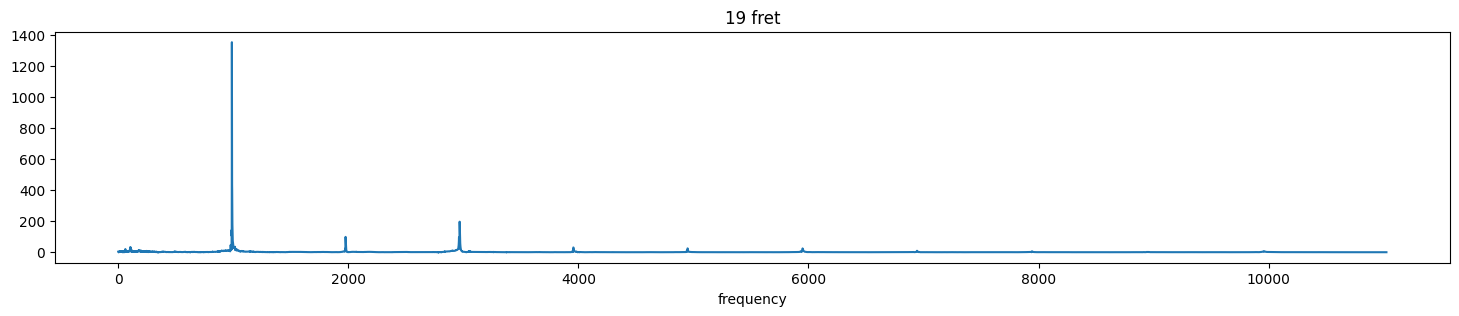

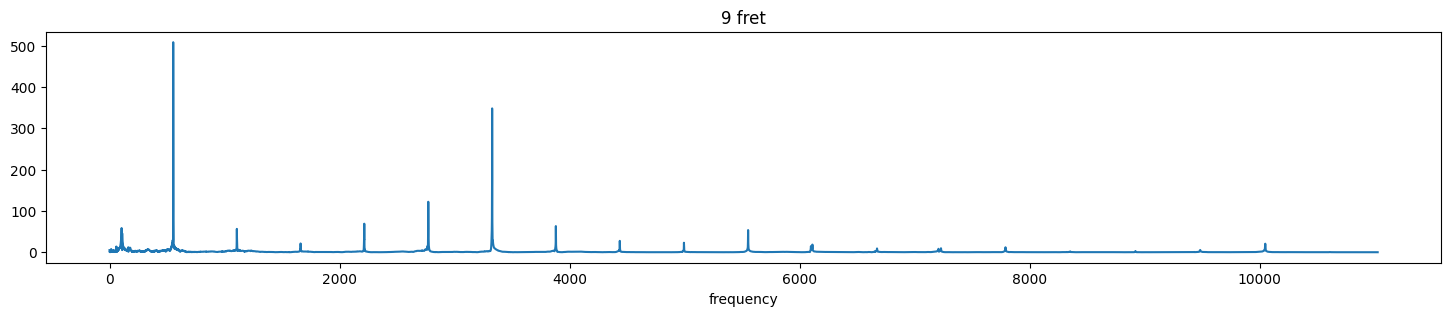

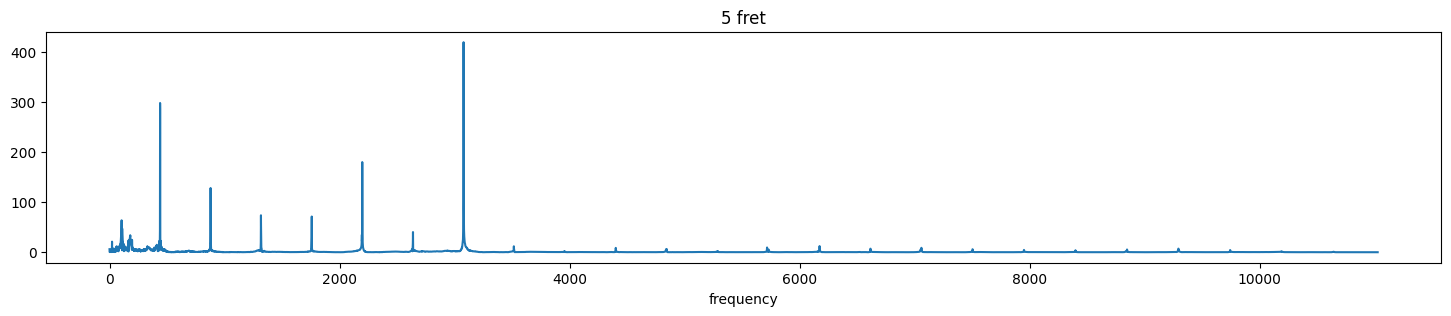

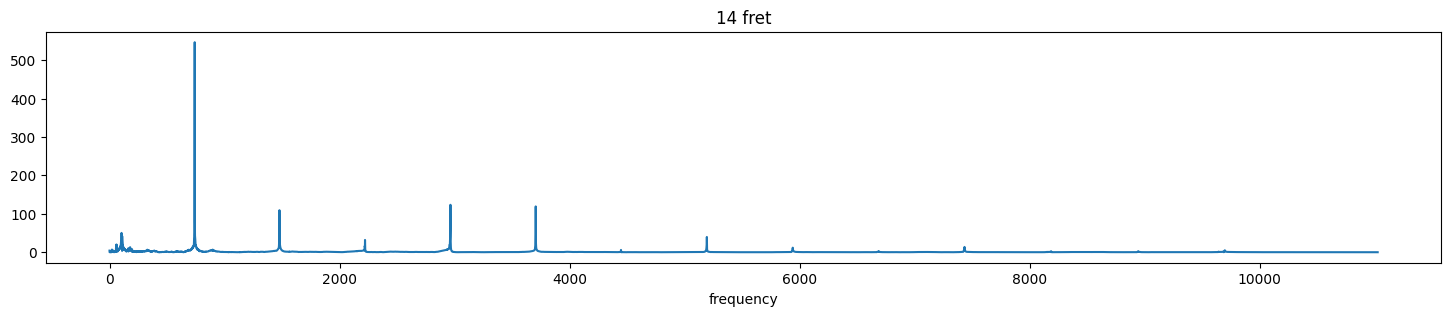

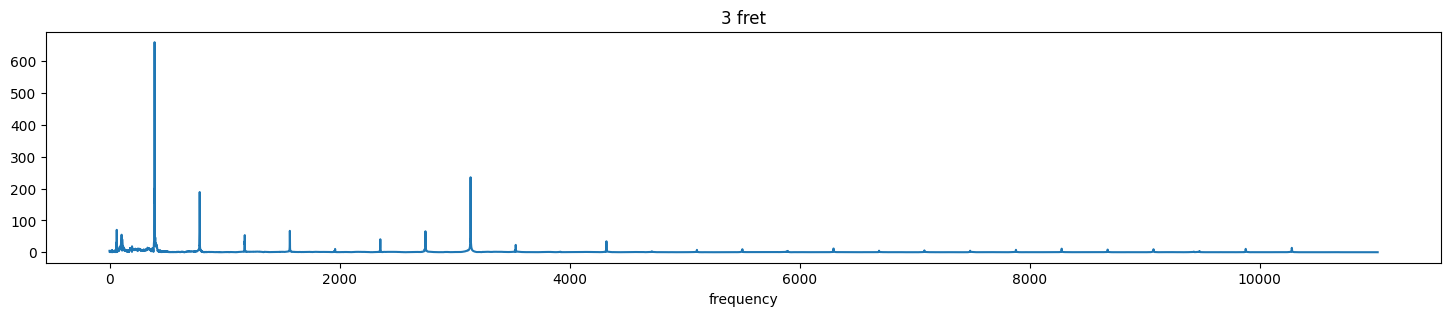

In [55]:
for fret in guitar.get_string(1).frets:
    guitar.get_string(1).get_fret(fret).show_magnitude_spectrum(f_ratio=0.5)

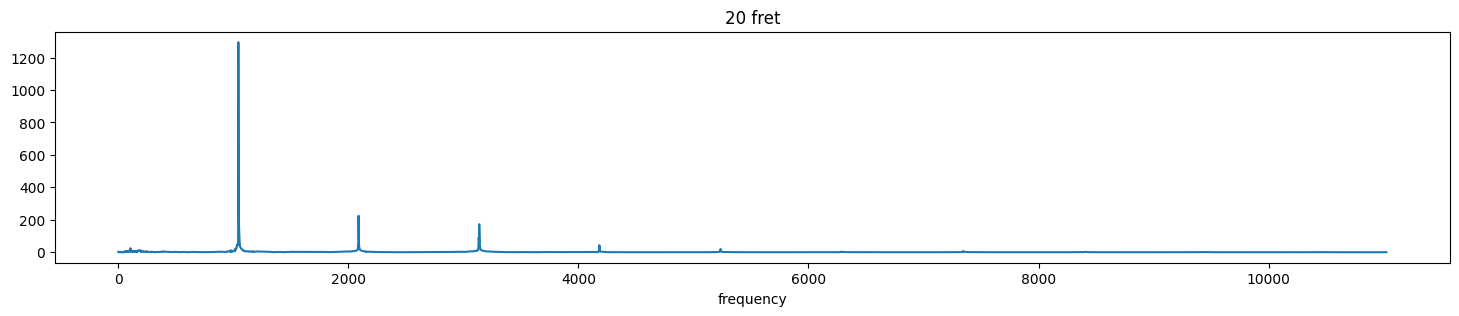

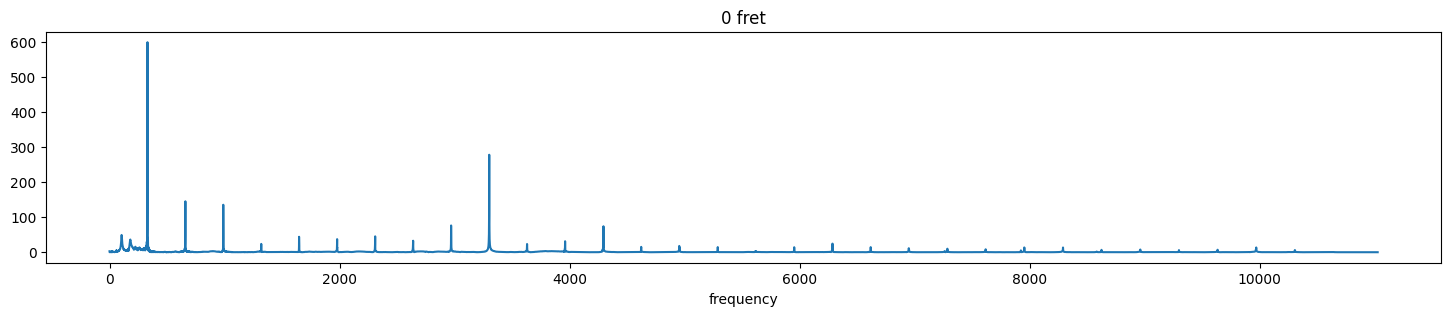

In [56]:
guitar.get_string(1).get_fret(20).show_magnitude_spectrum(f_ratio=0.5)
guitar.get_string(6).get_fret(0).show_magnitude_spectrum(f_ratio=0.5)

In [46]:
string = 3
fret = 3
guitar.get_string(string).get_fret(fret).calculate_magnitude_spectrum()
guitar.get_string(string).get_fret(fret).show_magnitude_spectrum(f_ratio=0.5)
print(np.argmax(guitar.get_string(string).get_fret(fret).magnitude_spectrum[:10000]))
get_main_frequency(guitar.get_string(string).get_fret(fret))

KeyError: 3

In [57]:
fret = guitar.get_string(6).get_fret(0)

In [64]:
def get_main_frequency(fret):
    def array_to_envelope(array_to_envelope, hop_length, frame_size, f_ratio=1):
        array_to_envelope = array_to_envelope[:int(len(array_to_envelope) * f_ratio)]
        envelope = list()

        for i in range(0, len(array_to_envelope), hop_length):
            current_frame_amplitude_envelope = max(array_to_envelope[i:i+frame_size])
            envelope.append(current_frame_amplitude_envelope)

        return envelope
    
    def calculate_diff_arg_picks(arg_picks):
        diff_arg_picks = list()

        for i in range(len(arg_picks) - 1):
            diff_arg_picks.append(arg_picks[i + 1] - arg_picks[i])

        return diff_arg_picks
    
    def filter_arg_picks(diff_arg_picks):
        """объеденять пики (в массив/в среднее значение/), которые находятся друг с другом"""
        arg_picks_filtered = list()

        for i in range(len(arg_picks) - 1):
            diff_arg_picks.append(arg_picks[i + 1] - arg_picks[i])

        return diff_arg_picks
    
    if True:
        env1 = array_to_envelope(fret.magnitude_spectrum, 64, 64)
        res = array_to_envelope(env1, 4, 4)

        res_np = np.array(res)
        mode = stats.mode(res_np).mode[0]*5
        print(mode, end="\n\n")
        
        picks = res_np[res_np > mode]
        print(f"picks = {picks}", end="\n\n")
    else:
        mode = stats.mode(fret.magnitude_spectrum).mode[0]*128*5
        print(mode, end="\n\n")
        
        picks = fret.magnitude_spectrum[fret.magnitude_spectrum > mode]
        
        
    
    arg_picks = np.where(np.isin(fret.magnitude_spectrum, picks))[0]
    print(f"arg_picks = {arg_picks}", end="\n\n")
    
    diff_arg_picks = calculate_diff_arg_picks(arg_picks)
    print(f"diff_arg_picks = {diff_arg_picks}", end="\n\n")
    
    return stats.mode(diff_arg_picks).mode[0]

130.98535711219355

picks = [434.59194336 171.44433312 199.2652352  199.2652352  171.44433312
 434.59194336]

arg_picks = [  570  1142  3425 30575 32858 33430]

diff_arg_picks = [572, 2283, 27150, 2283, 572]



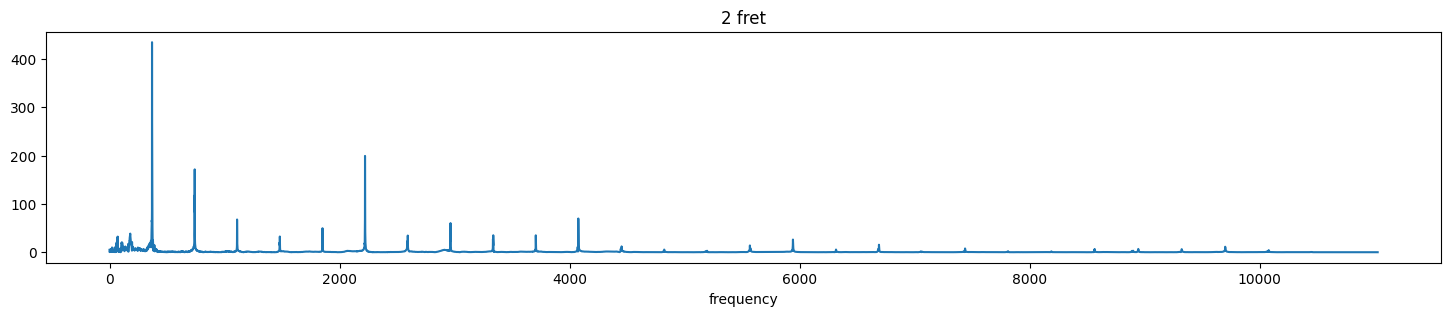

In [70]:
string, fret = 1, 2
get_main_frequency(guitar.get_string(string).get_fret(fret))
guitar.get_string(string).get_fret(fret).show_magnitude_spectrum(f_ratio=0.5)

In [ ]:
import scipy

In [75]:
import scipy
peak_indicies, props = scipy.signal.find_peaks(guitar.get_string(string).get_fret(fret).magnitude_spectrum, height=)

In [77]:
len(peak_indicies)

6838

In [67]:
for fret_n in range(21):
    string = 1
    fret = guitar.get_string(string).get_fret(fret_n)
    fret.calculate_magnitude_spectrum()
    print(fret.magnitude_spectrum[:5])
    print(f"string = {string}, fret = {fret_n} has main freq = {get_main_frequency(fret)}")

[5.28558396 1.52391972 1.24879865 0.94851344 0.8437399 ]
55.11541220682011

picks = [  70.43039062 1248.93480429  115.06704326   69.37466794  144.43487309
  120.87565853   76.13913375   76.13913375  120.87565853  144.43487309
   69.37466794 1248.93480429   70.43039062]

arg_picks = [  162   508   512  1016  1525  5087  6615 27385 28913 32475 32984 33492
 33838]

diff_arg_picks = [346, 4, 504, 509, 3562, 1528, 20770, 1528, 3562, 509, 508, 346]

string = 1, fret = 0 has main freq = 346
[6.00078418 0.44202481 0.68416356 0.52491245 0.83227293]
40.27382014782984

picks = [ 50.33881634 268.89116596 144.47711653  85.31979061 104.10231175
  48.28717342  63.77690225  60.88073287  49.69869682  49.69869682
  60.88073287  63.77690225  48.28717342 104.10231175  85.31979061
 144.47711653 268.89116596  50.33881634]

arg_picks = [  279   540  1079  1619  2698  3777  4319  4857  5401 28599 29143 29681
 30223 31302 32381 32921 33460 33721]

diff_arg_picks = [261, 539, 540, 1079, 1079, 542, 538, 544, 231

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

array([  24.27484586,   12.49874325,   12.35918146, 1294.55622661,
        224.79873857,  172.75903167,   13.60978928,   43.2229053 ,
         19.7925593 ,    6.54381999,    6.54381999,   19.7925593 ,
         43.2229053 ,  172.75903167,   13.49857682,    7.20132675,
        224.79873857,    6.22910346, 1294.55622661,   12.49874325,
         24.27484586])

In [98]:
m.mode[0]*20

11.652615342690272

In [99]:
np.where(res_np > m.mode[0]*100)

(array([  6,  12,  18, 113, 120, 126]),)

In [84]:
len(np.where(res_np > m*10)[0])

1130

In [68]:
res

[24.27484585930586,
 12.498743252746332,
 3.9174481298491863,
 2.586673290806034,
 1.979178662128288,
 12.359181456635786,
 1294.5562266118106,
 5.095988607694366,
 1.9589601148153608,
 2.4442917232562706,
 2.6612381542419272,
 4.70240939869914,
 224.7987385679218,
 3.4497674384600034,
 0.8117578452015162,
 0.921119136045601,
 0.8481450471427928,
 2.7483168325833427,
 172.75903167005958,
 13.609789280932464,
 1.2692767009182806,
 0.9463224790459007,
 1.03731781068344,
 0.9307504218303787,
 1.802360859585357,
 43.22290529907041,
 0.44560805734427317,
 0.23781414525646,
 0.2695418679130087,
 0.25037520143604713,
 0.5945131300993144,
 19.792559300601756,
 0.7959651828656895,
 0.30597929150421627,
 0.23351688531700074,
 0.2986720384223337,
 0.2955391299499507,
 2.9398837847793597,
 0.8309253778414831,
 0.5826307671345136,
 0.32944317737117185,
 0.3038450665538661,
 0.28236792325055254,
 0.6063399216170553,
 6.543819990584097,
 0.41144265099249944,
 0.16326027933410442,
 0.06567690436209558

In [44]:
np.sort(fret.magnitude_spectrum)[-39:]

array([ 115.69411192,  128.76653666,  128.76653666,  132.42420814,
        132.42420814,  141.7921925 ,  141.7921925 ,  144.1419872 ,
        144.1419872 ,  144.49889964,  144.49889964,  156.85035412,
        156.85035412,  172.75903167,  172.75903167,  179.86035004,
        179.86035004,  214.45808913,  214.45808913,  224.79873857,
        224.79873857,  267.16433727,  267.16433727,  339.98321053,
        339.98321053,  340.4129575 ,  340.4129575 ,  436.46791334,
        436.46791334,  559.02158646,  559.02158646,  597.05869116,
        597.05869116,  712.30027193,  712.30027193, 1023.82886201,
       1023.82886201, 1294.55622661, 1294.55622661])

In [34]:
np.argmax(.magnitude_spectrum[:1000])

509

In [37]:
len(guitar.get_string(6).get_fret(0).magnitude_spectrum)

34000

In [38]:
np.linspace(0, guitar.get_string(6).get_fret(0).sr, len(guitar.get_string(6).get_fret(0).magnitude_spectrum))

array([0.00000000e+00, 6.48548487e-01, 1.29709697e+00, ...,
       2.20487029e+04, 2.20493515e+04, 2.20500000e+04])

In [ ]:
509

In [33]:
guitar.get_string(6).get_fret(0).magnitude_spectrum[:1000].max()

600.1025801602265

In [25]:
guitar.get_string(1).get_fret(fret).magnitude_spectrum.size

34000

In [ ]:
fret = 4
plt.figure(figsize=(20, 10))
librosa.display.waveshow(guitar.get_string(1).get_fret(fret).signal, alpha=0.5)
plt.scatter(np.argmax(guitar.get_string(1).get_fret(fret).signal)/22050, guitar.get_string(1).get_fret(fret).signal.max())
plt.show()

In [227]:
np.argmax(guitar.get_string(1).get_fret(1).signal), guitar.get_string(1).get_fret(1).signal.max()

(10172, 0.23188703)